In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import torchaudio

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import pyaudio
p = pyaudio.PyAudio()

FORMAT = pyaudio.paInt16
#RATE = 22050
RATE = 16000
CHUNK = 1024
CHANNELS = 1

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK,
                input_device_index=3)

RECORD_SECONDS = 5
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
  data = stream.read(CHUNK)
  frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()

In [36]:
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                output=True,
                frames_per_buffer=CHUNK,
                input_device_index=3)
for f in frames:
  stream.write(f)
stream.close()
p.terminate()

(79872,)
torch.Size([1, 80, 313])


/var/folders/3k/26p73qfx1vn6qwdlmpfbw_pr0000gn/T/ipykernel_21005/2562682478.py:9: RuntimeWarning: divide by zero encountered in log10
  imshow(np.log10(mel_specgram[0]))


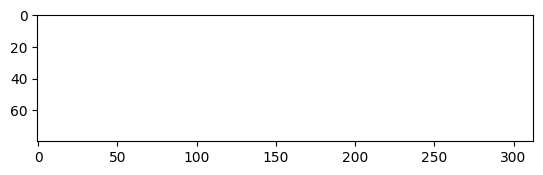

In [37]:
waveform = np.frombuffer(b''.join(frames), np.int16)/32768
print(waveform.shape)

import torch
import torchaudio
transform = torchaudio.transforms.MelSpectrogram(22050, n_fft=1024, win_length=1024, hop_length=256, n_mels=80)
mel_specgram = transform(torch.tensor(waveform[None]).type(torch.float32))
print(mel_specgram.shape)
imshow(np.log10(mel_specgram[0]))

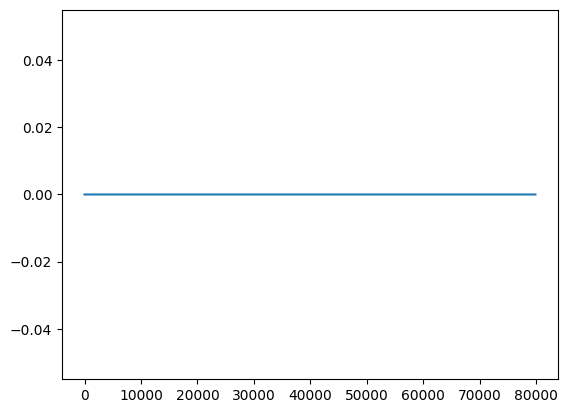

In [38]:
plot(waveform)

In [39]:
from rec import Rec
import torch
model = Rec()
vals = torch.load('demo/tinyvoice_1652627131_165_0.11.pt', map_location=torch.device('cpu'))
model.load_state_dict({k[7:]:v for k,v in vals.items()})

<All keys matched successfully>

torch.Size([124, 1, 30])



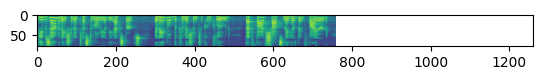

In [44]:
from rec import load_example, CHARSET
from preprocess import to_text
model.eval()
fake_val = load_example('recordedFile.wav')
# fake_val = mel_specgram[0].T
imshow(torch.concat([torch.log10(val).T, torch.log10(fake_val).T], axis=1))
mguess = model(fake_val[None], torch.tensor([fake_val.shape[0]]))[0]
print(mguess.shape)
#print(mguess[:, 0, :].argmax(dim=1))
pp = to_text(mguess[:, 0, :].argmax(dim=1).cpu().numpy())
print(pp)

In [41]:
import pyaudio

p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')

for i in range(0, numdevices):
    if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
        print("Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))

Input Device id  3  -  Samson Meteor Mic
Input Device id  5  -  MacBook Pro Microphone


In [1]:
import pyaudio
import wave
 
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 512
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "recordedFile.wav"
device_index = 2
audio = pyaudio.PyAudio()

print("----------------------record device list---------------------")
info = audio.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')
for i in range(0, numdevices):
        if (audio.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print("Input Device id ", i, " - ", audio.get_device_info_by_host_api_device_index(0, i).get('name'))

print("-------------------------------------------------------------")

index = int(input())
print("recording via index "+str(index))

stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,input_device_index = index,
                frames_per_buffer=CHUNK)
print ("recording started")
Recordframes = []
 
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    Recordframes.append(data)
print ("recording stopped")
 
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(Recordframes))
waveFile.close()

----------------------record device list---------------------
Input Device id  3  -  Samson Meteor Mic
Input Device id  5  -  MacBook Pro Microphone
-------------------------------------------------------------
recording via index 3
recording started
recording stopped
